<a href="https://colab.research.google.com/github/olexandr7/erm_workshop/blob/main/ERM_workshop_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Workshop 2** is focused on trying out image manipulation

Let's now pick an image from MuIS and try several operations:
* inverting image
* changing image colorspace
* visual pattern matching

**Block 1**: installing relevant libraries for image manipulation

In [2]:
# Importing/installing libraries
%pip install cvlib
%matplotlib inline
#------------------
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import requests
#------------------
from PIL import Image
from cvlib.object_detection import draw_bbox
from google.colab.patches import cv2_imshow
from skimage import io
from matplotlib import pyplot as plt

**Block 2**: loading image from MuIS
string
<br>  <font color='orange'>Action point:</font> Try changing URL to any image from MuIS (right click on image -> copy image link) https://www.muis.ee/museaalview/1887998

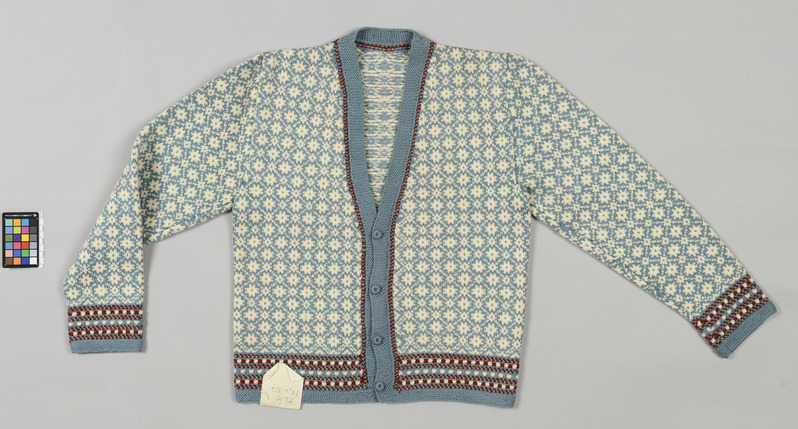

In [3]:
#Loading image
url = "https://www.muis.ee/digitaalhoidla/api/meedia/pisipilt?id=dbcd28ca-89e3-4c13-b6e8-b0cbc889c771"  #<---  URL could be changed to any image from MuIS
url_response = urllib.request.urlopen(url)
img = cv2.imdecode(np.array(bytearray(url_response.read()), dtype=np.uint8), -1)
cv2_imshow(img)

**Block 3**: Performing image manipulations
<br>  <font color='orange'>Action point:</font> Try changing the code below to display only 1 image (not 3) - inverted

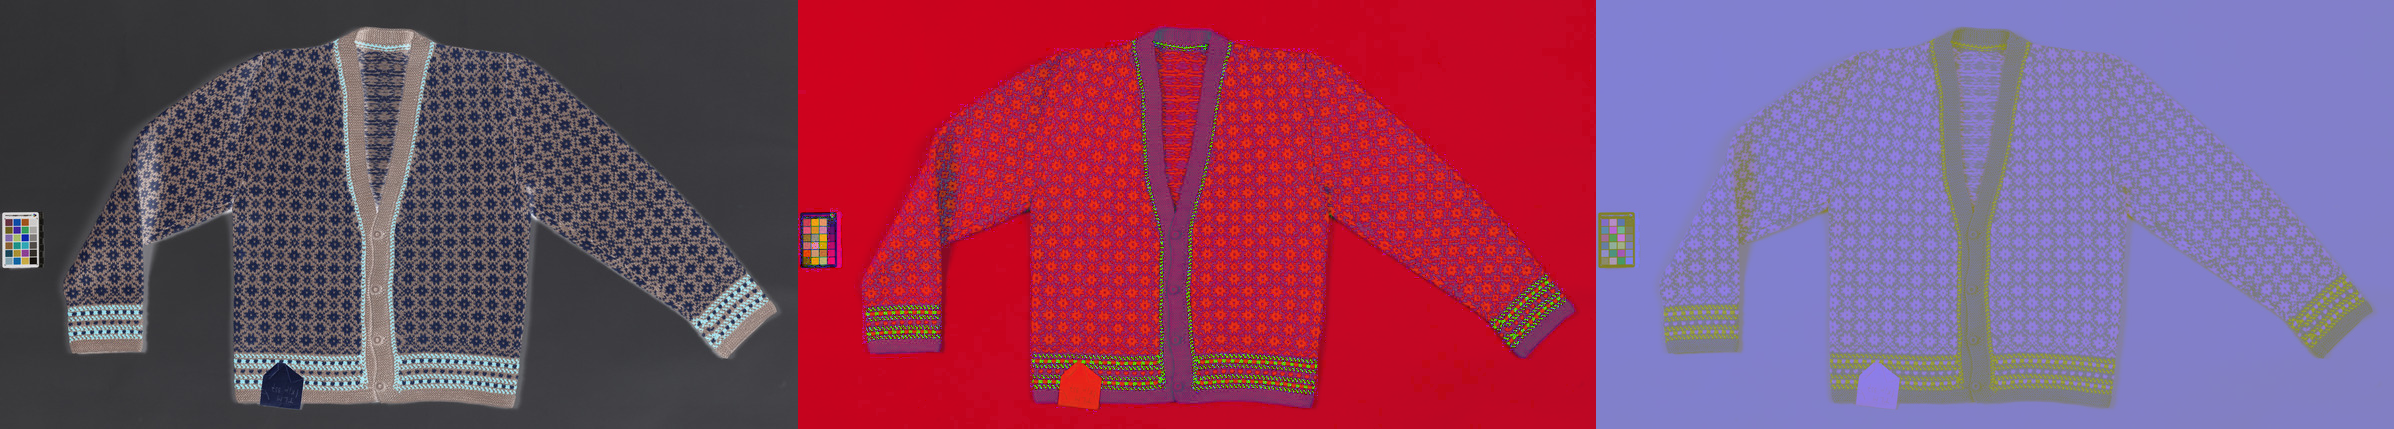

In [ ]:
#Inverting image
inverted = cv2.bitwise_not(img)
#Setting image to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#Setting image to LAB
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
#Creating a collage of all modified images
img_all = np.hstack([inverted,  hsv, lab])
#displaying all modified images
cv2_imshow(img_all)

**Block 4**: Template matching - loading and preparing MuIS images
<br>  <font color='orange'>Action point:</font> Try changing URLs for image and template for a suitable combination from MuIS

In [63]:
#Choosing image and template - code taken from opencv tutorial at:
#https://docs.opencv.org/3.4/d4/dc6/tutorial_py_template_matching.html

#Loading image and template
#url_img = "https://www.muis.ee/digitaalhoidla/api/meedia/pisipilt?id=236f05e6-4060-4190-9eaf-0f0f70e0d09e"       #<---  URL could be changed to any image from MuIS
#url_template = "https://www.muis.ee/digitaalhoidla/api/meedia/pisipilt?id=5120c5cc-6e75-4dca-a366-df361a138f8a"  #<---  URL could be changed to any image from MuIS

url_img = "https://www.muis.ee/digitaalhoidla/api/meedia/pisipilt?id=528fd080-f2bb-4f42-8d75-dd67860cca50"       #<---  URL could be changed to any image from MuIS
#url_template = "https://www.muis.ee/digitaalhoidla/api/meedia/pisipilt?id=5120c5cc-6e75-4dca-a366-df361a138f8a"  #<---  URL could be changed to any image from MuIS

#loading images
url_response_img = urllib.request.urlopen(url_img)
img = cv2.imdecode(np.array(bytearray(url_response_img.read()), dtype=np.uint8), -1)
template = cv2.imdecode(np.fromfile('/content/imgt.PNG', dtype=np.uint8), cv2.IMREAD_UNCHANGED)
#if template is also uploaded from url
#url_response_template = urllib.request.urlopen(url_template)
#template = cv2.imdecode(np.array(bytearray(url_response_template.read()), dtype=np.uint8), -1)

#setting to grey color palette
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
#type conversion
img = img.astype(np.uint8)
template = template.astype(np.uint8)


#adaptive thresholding
img_gray = cv2.medianBlur(img_gray,5)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img_gray,(5,5),0)
ret3,img_gray = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#verifying that images are loaded
if img is None or template is None:
    print('Could not open or find the images!')
else:
    print('Images successfully loaded!')

#resizing (keeping just in case - sometimes needed to resize template)
#template = cv2.resize(template, (0, 0), fx = 0.1, fy = 0.1)

Images successfully loaded!


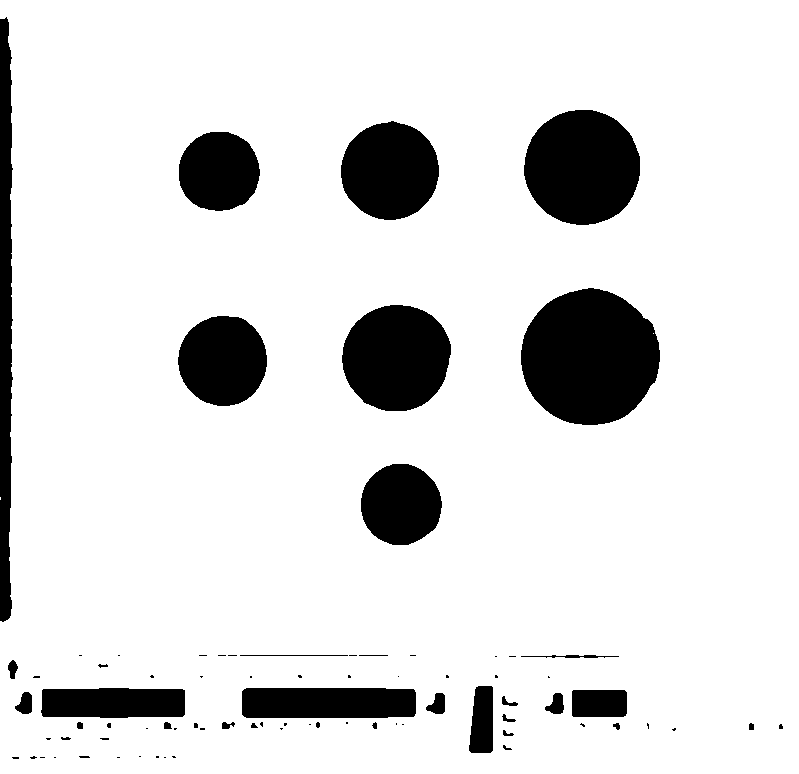

In [44]:
cv2_imshow(img_gray)

**Block 5**: Applying and visualizing pattern matching
<br>  <font color='orange'>Action point:</font> Try changing the titles on displayed match results

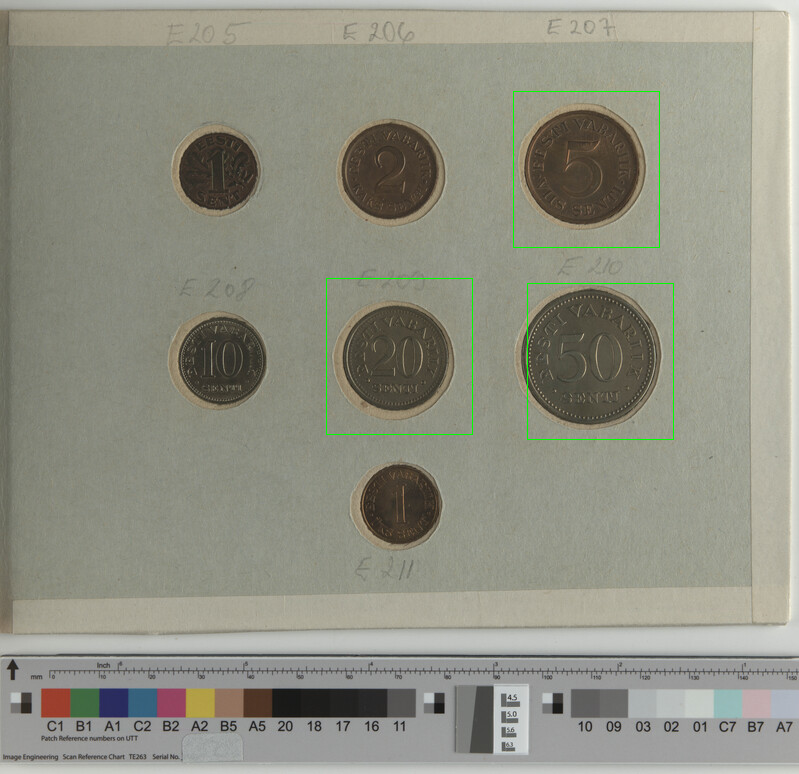

In [64]:
#https://docs.opencv.org/3.4/d4/dc6/tutorial_py_template_matching.html
#https://stackoverflow.com/questions/50579050/template-matching-with-multiple-objects-in-opencv-python

#Setting pre-requisites for template/pattern matching
h, w = template.shape[:4]

method = cv2.TM_CCOEFF_NORMED

threshold = 0.7

res = cv2.matchTemplate(img_gray, template, method)

# fake out max_val for first run through loop
max_val = 1
prev_min_val, prev_max_val, prev_min_loc, prev_max_loc = None, None, None, None
while max_val > threshold:
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # Prevent infinite loop. If those 4 values are the same as previous ones, break the loop.
    if prev_min_val == min_val and prev_max_val == max_val and prev_min_loc == min_loc and prev_max_loc == max_loc:
        break
    else:
        prev_min_val, prev_max_val, prev_min_loc, prev_max_loc = min_val, max_val, min_loc, max_loc

    if max_val > threshold:
        # Prevent start_row, end_row, start_col, end_col be out of range of image
        start_row = max(0, max_loc[1] - h // 2)
        start_col = max(0, max_loc[0] - w // 2)
        end_row = min(res.shape[0], max_loc[1] + h // 2 + 1)
        end_col = min(res.shape[1], max_loc[0] + w // 2 + 1)

        res[start_row: end_row, start_col: end_col] = 0
        img = cv2.rectangle(img,(max_loc[0],max_loc[1]), (max_loc[0]+w+1, max_loc[1]+h+1), (0,255,0) )

cv2_imshow(img)

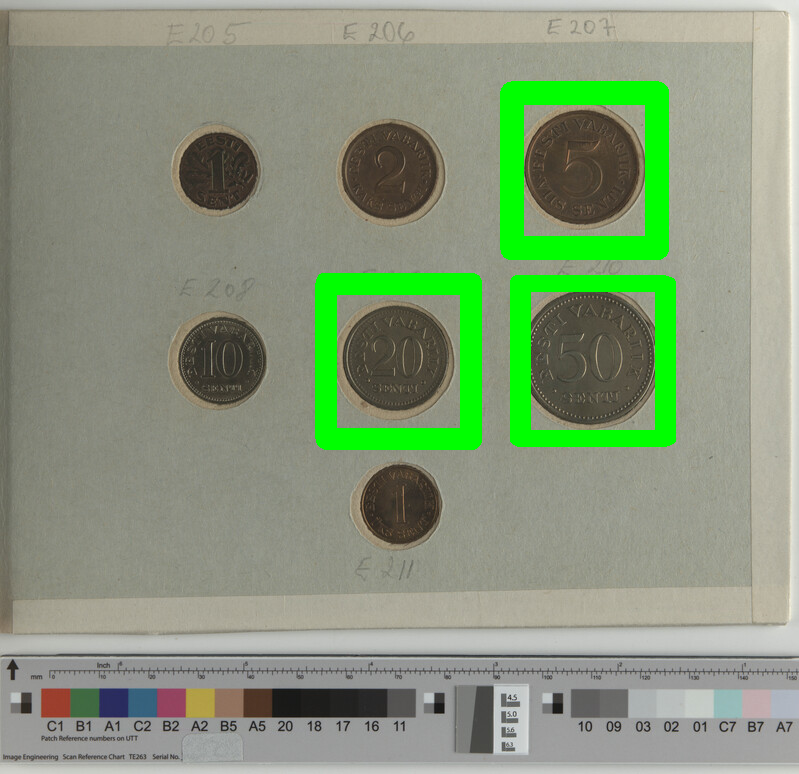

In [60]:
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.75
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,255,0))
cv2.imwrite('res.png',img)

cv2_imshow(img)